<a href="https://colab.research.google.com/github/tatha04/Titanic-Machine-Learning-from-Disaster/blob/main/Titanic_ML_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic : Machine Learning from Disaster
This is a beginners attempt to work with the Titanic: ML from disaster dataset available from [Kaggle](https://www.kaggle.com/c/titanic/data).
The data has been already separated into two groups - the training set and the test set.

###Contents:
* Import dataset from Kaggle/local storage.
* Import necessary libraries.
* Explore and visualize the dataset. Identify numerical and categorical features.
* Fnd outif any of the features has missing data. If yes, fill up missing data.
* Feature Engineering : Drop unneccesary columns. Adjust other columns into usable features.
* Model fitting : Choose best fit model.

## Import necessary Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random

## Import Dataset
I have downloaded the dataset into google drive and have mounted the drive into google colab workspace. You need to change the path with the correct path of the data files.

In [3]:
df_Train = pd.read_csv("/content/drive/My Drive/Data Science/Data_Sets/Titanic/train.csv")
df_Test = pd.read_csv("/content/drive/My Drive/Data Science/Data_Sets/Titanic/test.csv")

## Explore the Dataset

In [4]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Shape")
print("Training data : ", df_Train.shape)
print("Test data     : ", df_Test.shape)

Shape
Training data :  (891, 12)
Test data     :  (418, 11)


Thus the Training and Test datasets contains records of 891 and 418 passengers, respectively. In the Training dateset, there is column 'Survived' that specifies whether the passenger did or did not survive. 

## Data Analysis and Visualization

In [6]:
df_Train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Klasen, Mr. Klas Albin",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
df_Test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [8]:
print(df_Train.columns)
print()
print(df_Train.dtypes)
print()

s = (df_Train.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

s = (df_Train.dtypes == 'int')
num_cols = list(s[s].index)
print("Integer variables:")
print(num_cols)

s = (df_Train.dtypes == 'float')
num_cols = list(s[s].index)
print("Real variables:")
print(num_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Categorical variables:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Integer variables:
['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']
Real variables:
['Age', 'Fare']


The datasets have the following columns : 
* Categorical:
  * Name : Passenger name
  * Sex : female or male
  * Ticket : Ticket number, an alphnumeric value
  * Cabin : Cabin number, an alphanumeric value
  * Embarked : Where the passenger embarked on the ship ( S : Southampton, C : Cherbourg or Q : Queenstown)
* Integer:
  * PassengerId
  * Survived : 0 (did not survive) or 1 (survived)
  * Pclass: Passenger class ( 1, 2 or 3)
  * SibSp : Number of siblings or spouse
  * Parch : Number of parents or children
* Floating:
  * Age : Age of the passenger
  * Fare : Ticket fare

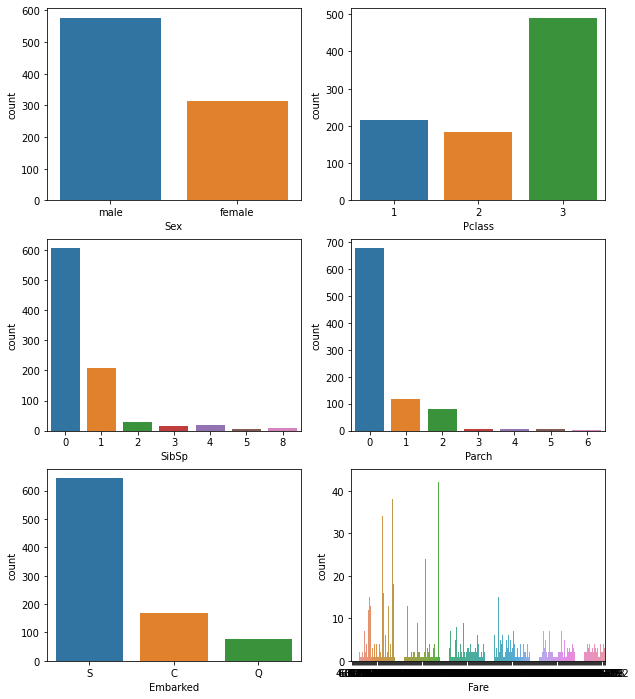

In [9]:
plt.figure(figsize=(10,12))
plt.title('Frequencies')

plt.subplot(3,2,1)
sns.countplot(x = df_Train['Sex'])

plt.subplot(3,2,2)
sns.countplot(x = df_Train['Pclass'])

plt.subplot(3,2,3)
sns.countplot(x = df_Train['SibSp'])

plt.subplot(3,2,4)
sns.countplot(x = df_Train['Parch'])

plt.subplot(3,2,5)
sns.countplot(x = df_Train['Embarked'])

plt.subplot(3,2,6)
sns.countplot(x = df_Train['Fare'])

Survival Fraction
Sex =  male :  0.18890814558058924
Sex =  female :  0.7420382165605095

Pclass =  1 :  0.6296296296296297
Pclass =  2 :  0.47282608695652173
Pclass =  3 :  0.24236252545824846

SibSp =  0 :  0.34539473684210525
SibSp =  1 :  0.5358851674641149
SibSp =  2 :  0.4642857142857143
SibSp =  3 :  0.25
SibSp =  4 :  0.16666666666666666
SibSp =  5 :  0
SibSp =  8 :  0

Parch =  0 :  0.34365781710914456
Parch =  1 :  0.5508474576271186
Parch =  2 :  0.5
Parch =  3 :  0.6
Parch =  4 :  0
Parch =  5 :  0.2
Parch =  6 :  0

Embarked =  S :  0.33695652173913043
Embarked =  C :  0.5535714285714286
Embarked =  Q :  0.38961038961038963



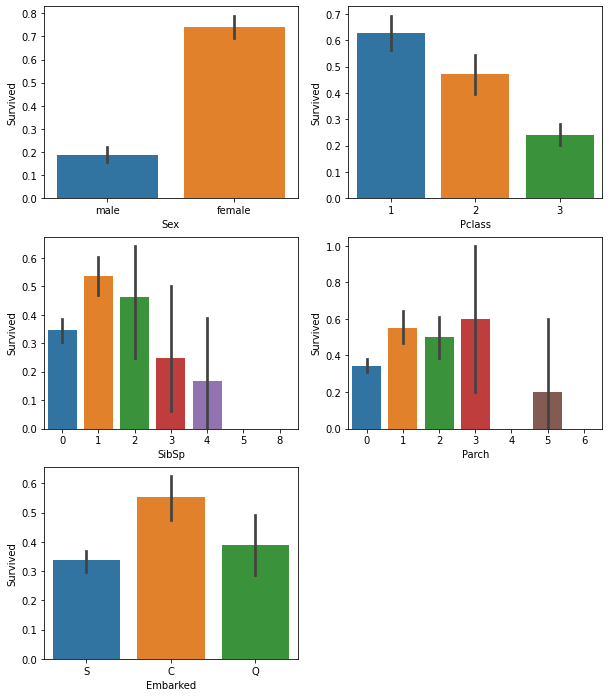

In [10]:
plt.figure(figsize=(10,12))
plt.title('Survival Fractions')

plt.subplot(3,2,1)
sns.barplot(x = df_Train['Sex'],y = df_Train['Survived'])

plt.subplot(3,2,2)
sns.barplot(x = df_Train['Pclass'],y = df_Train['Survived'])

plt.subplot(3,2,3)
sns.barplot(x = df_Train['SibSp'],y = df_Train['Survived'])

plt.subplot(3,2,4)
sns.barplot(x = df_Train['Parch'],y = df_Train['Survived'])

plt.subplot(3,2,5)
sns.barplot(x = df_Train['Embarked'],y = df_Train['Survived'])

print('Survival Fraction')

for i in df_Train['Sex'].unique():
    print('Sex = ', i, ': ', df_Train['Survived'][df_Train['Sex'] == i].value_counts(normalize=True)[1])
print()

for i in df_Train['Pclass'].sort_values().unique():
  print('Pclass = ', i, ': ', df_Train['Survived'][df_Train['Pclass'] == i].value_counts(normalize=True)[1])
print()

for i in df_Train['SibSp'].sort_values().unique():
  if (df_Train['Survived'][df_Train['SibSp']==i].sum() > 0):
    print('SibSp = ', i, ': ', df_Train['Survived'][df_Train['SibSp'] == i].value_counts(normalize=True)[1])
  else:
    print('SibSp = ', i, ': ', 0)

print()

for i in df_Train['Parch'].sort_values().unique():
  if (df_Train['Survived'][df_Train['Parch']==i].sum() > 0):
    print('Parch = ', i, ': ', df_Train['Survived'][df_Train['Parch'] == i].value_counts(normalize=True)[1])
  else:
    print('Parch = ', i, ': ', 0)
print()

for i in df_Train['Embarked'].dropna().unique():
  print('Embarked = ', i, ': ', df_Train['Survived'][df_Train['Embarked'] == i].value_counts(normalize=True)[1])
print()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


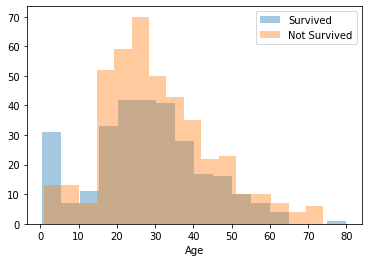

In [11]:
#sns.distplot(X_Train['Age'],kde=False, label='Total')
sns.distplot(df_Train['Age'][df_Train['Survived']==1],kde=False,label='Survived')
sns.distplot(df_Train['Age'][df_Train['Survived']==0],kde=False,label='Not Survived')
plt.legend()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


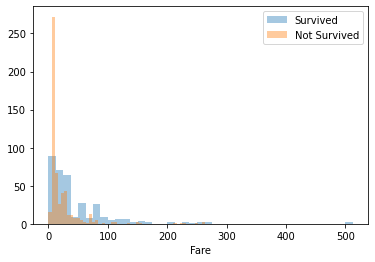

In [12]:
#sns.distplot(X_Train['Fare'],kde=False, label='Total')
sns.distplot(df_Train['Fare'][df_Train['Survived']==1],kde=False,label='Survived')
sns.distplot(df_Train['Fare'][df_Train['Survived']==0],kde=False,label='Not Survived')
plt.legend()

### Observations
* The passengers in the training set were predominantly male ( almost twice as many as the number of females). However the chances of survival were much higher for female passengers. 
* The number of passengers travelling in 3rd class was much larger compared with the other two. However the probability of survival decreases with the passenger class with PC1 > PC2 > PC3. This might be expected.
* Most of the passengers embarked at Southampton. For some reason the chance of survival is maximum for Cherbourg, followed by Queenstown and Southampton.
* The number of passengers travelling alone outnumbers the others (i.e. those with children, parents of spouses). It is difficult to see direclty from the probabilities any correlation between SibSp and Parch. All we can say is that people who were travelling alone or with large families were less likely to survive. People who were accompanied by 1-2 spouse/siblings or 2-3 parents/children were more likely to survive.
* Children were more likely to survive.
* Fares has an extremmely skewed distribution. We need to either (a) plot it on a logithmic scale and see if it has a more uniform  distribution, or (b) divide it into suitable bins.



## Missing Values

In [56]:
df_combined = pd.concat([df_Train,df_Test])
X_Train = df_Train.copy()
X_Test = df_Test.copy()

In [57]:
print("Missing Values : Training Data")
print(df_Train.isnull().sum())
print()
print("Missing Values : Test Data")
print(df_Test.isnull().sum())

Missing Values : Training Data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Missing Values : Test Data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Cabin:

The majority of the entries in the feature 'Cabin' is missing. So we might as well drop it. However it possible that the values were more likely to be available for those that survived the sinking. Conversely, the passenger with a cabin information is more likely to survive.

In [58]:
X_Train["CabinBool"] = (X_Train["Cabin"].notnull().astype('int'))
X_Test["CabinBool"] = (X_Test["Cabin"].notnull().astype('int'))

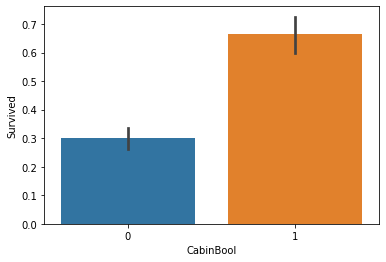

In [59]:
sns.barplot(x = X_Train['CabinBool'],y = X_Train['Survived'])

### Embarked:
There are two missing values in the training set. We will fill up these values with the mode of the mode of the distribution i.e. with 'S'

In [60]:
df_Train.fillna({'Embarked' : 'S'},inplace=True)

### Age:
The training and test datasets have 177 and 86 missing values for Age, respectively. There are a large number of missing values, and they can be dealt with the following approaches:
* Fill the missing values with a random distribution with mean and standard deviation of the training and test sets respectively. However, this can give rise to unphysical Age values < 0.
* Fill the missing values with random integer values between [Mean - Std. Dev, Mean +  Std. Dev]. I will be using this approach as a first approximation.
* A more elegant approach might be to infer the age of the passenger based on the title (i.e. Mr. Mrs. Master etc.) on the passenger's name.

In [61]:
Age_mean = df_combined['Age'].mean()
Age_sigma  = df_combined['Age'].std()
X_Train['Age'][X_Train['Age'].isnull()] = random.randint(Age_mean - Age_sigma, Age_mean + Age_sigma, int(X_Train['Age'].isnull().sum()))
X_Test['Age'][X_Test['Age'].isnull()]   = random.randint(Age_mean - Age_sigma, Age_mean + Age_sigma, int(X_Test['Age'].isnull().sum()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


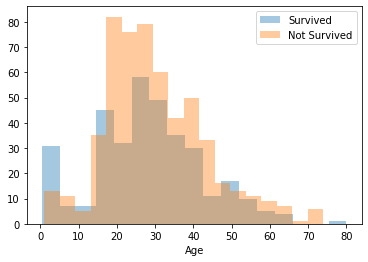

In [62]:
#sns.distplot(X_Train['Age'],kde=False, label='Total')
sns.distplot(X_Train['Age'][X_Train['Survived']==1],kde=False,label='Survived')
sns.distplot(X_Train['Age'][X_Train['Survived']==0],kde=False,label='Not Survived')
plt.legend()

### Fare:
The Test set has 1 missing fare value. We can set it to be the mean of the fares of the corresponding Pclass.

In [63]:
df_Test[df_Test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [64]:
X_Test.loc[152, 'Fare'] = df_combined['Fare'][df_combined['Pclass']==3].mean()

## Data Cleaning
In this section, we will go over the columns one by one and modify them as features if necessary.

In [65]:
X_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### PassengerId :
Drop this column as survival is unlikely to depend on these values.

In [66]:
X_Train.drop(columns='PassengerId',inplace=True)
X_Test.drop(columns='PassengerId',inplace=True)

### Pclass :
This column can be directly used as a feature vector.

### Name :
As a first approximation, let us drop this column. A more detailed approach might be to extract a feature depending on the title on the passenger name. However this is likely to have a correspondence with the Age of the passengers.

In [67]:
X_Train.drop(columns='Name',inplace=True)
X_Test.drop(columns='Name',inplace=True)

### Sex :
We can map this column to numerical values such that male : 0 and female : 1.

In [68]:
sex_mapping = {'male': 0, 'female': 1}
X_Train['Sex'] = df_Train['Sex'].map(sex_mapping)
X_Test['Sex'] = df_Test['Sex'].map(sex_mapping)

### Ticket :
Drop this column as it is unlikely to yield any useful information.

In [69]:
X_Train.drop(columns='Ticket',inplace=True)
X_Test.drop(columns='Ticket',inplace=True)

### Cabin :
Drop this column as it contains a large number of missing values. Any useful information has been saved in the column CabinBool.

In [70]:
X_Train.drop(columns='Cabin',inplace=True)
X_Test.drop(columns='Cabin',inplace=True)

### Embarked :
Map the 'Embarked' column into numerical feature vector such that S : 0, Q : 1 and C : 2.
Alternatively one can perform a onehot coding of the three labels for better results (maybe).

In [71]:
embarked_mapping = {'S' : 0, 'Q' : 1, 'C' : 2}
X_Train['Embarked'] = df_Train['Embarked'].map(embarked_mapping)
X_Test['Embarked']  = df_Test['Embarked'].map(embarked_mapping)

### SibSp and Parch :
Since both these columns have information regarding the family sizes and co-passengers, we can combine both of them to create a new feature called 'Family_Size' = No. of Parents/Children + No. of Siblings/Spouses + 1 (the passenger himself/herself). Plot and see how survival probability depends on this feature.

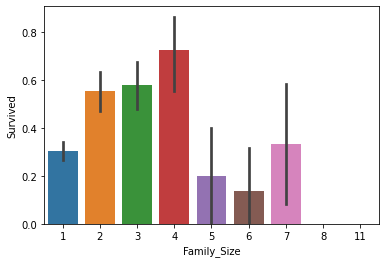

In [72]:
X_Train['Family_Size'] = X_Train['SibSp'] + X_Train['Parch'] + 1
sns.barplot(x = X_Train['Family_Size'],y = X_Train['Survived'])

Family sizes with No. of Members = 2,3, and 4 are more likely to survive (probability ~ 60-70%) wheras persons travellig alone (Family size = 1) or with a large family (Family size >= 5) have a low survival probability (~15-25%). We can create a feature vector 'Small_Family' and set it to 1 for Family Sizes 2,3, and 4. Use this feature vector and drop 'SibSp', 'Parch' and 'Family_Size'

In [73]:
X_Train['Small_Family'] = 0
X_Train.loc[(X_Train['Family_Size'] > 1) & (X_Train['Family_Size'] < 5) , 'Small_Family'] = 1
X_Train.drop(columns = ['SibSp','Parch','Family_Size'], inplace = True)

Do the same for the Test Dataset.

In [74]:
X_Test['Family_Size'] = X_Test['SibSp'] + X_Test['Parch'] + 1
X_Test['Small_Family'] = 0
X_Test.loc[(X_Test['Family_Size'] > 1) & (X_Test['Family_Size'] < 5) , 'Small_Family'] = 1
X_Test.drop(columns = ['SibSp','Parch','Family_Size'], inplace = True)

### Fare :
We will be dividing the column 'Fare' into 4 quantiles with labels : 1,2,3,4. This will be saved as a new feature 'Fare_band'. Subsequently drop the 'Fare' column.

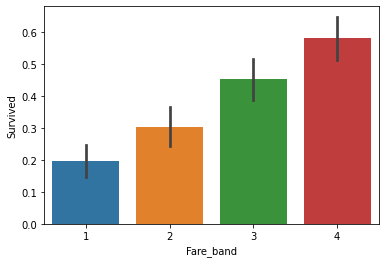

In [75]:
X_Train['Fare_band'] = pd.qcut(X_Train['Fare'],q=4,labels=[1,2,3,4])
X_Test['Fare_band']  = pd.qcut(X_Test['Fare'],q=4,labels=[1,2,3,4])
X_Train.drop(columns ='Fare', inplace = True)
X_Test.drop(columns = 'Fare', inplace = True)
sns.barplot(x = X_Train['Fare_band'] ,y = X_Train['Survived'])

### Age :
We can either leave the column 'Age' as it is and use it as a feature vector. In this case it might be better to shift and rescale the values using the mean and standard deviation.
An alternate approach would be to band different age groups into a number of bins (5 or 6) and label the passenger age depending on the age group into which it falls.

In [79]:
X_Train['AgeBand'] = pd.cut(X_Train['Age'], 5)
X_Train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.531532
1,"(16.336, 32.252]",0.353712
2,"(32.252, 48.168]",0.371901
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [82]:
Age_bins = [0,16,32,48,64,80]
X_Train['AgeBand'] = pd.cut(X_Train['Age'], bins = Age_bins, labels = [0,1,2,3,4])
X_Test['AgeBand']  = pd.cut(X_Test['Age'], bins = Age_bins, labels = [0,1,2,3,4])

In [84]:
X_Train.drop(columns = 'Age', inplace = True)
X_Test.drop(columns = 'Age', inplace = True)  

In [85]:
X_Train.head()

,Survived,Pclass,Sex,Embarked,CabinBool,Small_Family,Fare_band,AgeBand
0,0,3,0,0,0,1,1,1
1,1,1,1,2,1,1,4,2
2,1,3,1,0,0,0,2,1
3,1,1,1,0,1,1,4,2
4,0,3,0,0,0,0,2,2


In [86]:
X_Test.head()

,Pclass,Sex,Embarked,CabinBool,Small_Family,Fare_band,AgeBand
0,3,0,1,0,0,1,2
1,3,1,0,0,1,1,2
2,2,0,1,0,0,2,3
3,3,0,0,0,0,2,1
4,3,1,0,0,1,2,1


Finally prepare for model fitting. Copy the column 'Survived' into Y_Train and delete the column from the training set.

In [88]:
Y_Train = X_Train['Survived']
X_Train.drop(columns = 'Survived', inplace = True)

## Model Fitting
The problem is a classification problem. I would be using the following classifiers and compare the results.
* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
* Stochastic Gradient Descent


In [102]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_Train, Y_Train)
Y_Pred_logreg = logreg.predict(X_Test)
acc_logreg = round(logreg.score(X_Train, Y_Train) * 100, 2)
print(acc_logreg)

80.36


In [121]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier()
dectree.fit(X_Train, Y_Train)
Y_Pred_dectree = dectree.predict(X_Test)
acc_dectree = round(dectree.score(X_Train, Y_Train) * 100, 2)
print(acc_dectree)

87.09


In [122]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 

ranfor = RandomForestClassifier()
ranfor.fit(X_Train, Y_Train)
Y_Pred_ranfor = ranfor.predict(X_Test)
acc_ranfor = round(ranfor.score(X_Train, Y_Train) * 100, 2)
print(acc_ranfor)

87.09


In [131]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_Train,Y_Train)
Y_Pred_sgd = sgd.predict(X_Test)
acc_sgd = round(sgd.score(X_Train,Y_Train) * 100, 2)
print(acc_sgd)

80.02


Both Random Forest Classifier and Decision Tree Classifier have better accuracies compared to the other methods.

## Preparing submission File
I would be using the results obtained from the RandomForestClassifier to submit to Kaggle.

In [132]:
submission = pd.DataFrame({"PassengerId": df_Test["PassengerId"], "Survived": Y_Pred_ranfor })
submission.to_csv('Titanic.csv', index=False)

I would like to acknowledge the help from the following Kaggle notebooks.
* https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner
* https://www.kaggle.com/startupsci/titanic-data-science-solutions